# Data visualization basics with Seaborn

In data-intensive research it is important to visualize data. Data visualization gives us a clear idea of what the information (inside your data) means by giving it visual context through graphs. This makes the data more natural for the human mind for data interpretation and therefore makes it easier to identify trends, patterns, and outliers within large datasets.

For Python, there are multiple different data visualization libraries, such as:

* [Matplotlib](https://matplotlib.org/) (basic visualization library)
* [Seaborn](https://seaborn.pydata.org) (low-code visualization library)
* [Plotly](https://plotly.com/python/) (highly interactive library)
* [Plotnine](https://plotnine.readthedocs.io/en/stable/) (R's ggplot2 like library)

### Goal of this notebook

In this notebook you will go over data visualization examples using famous Iris dataset and Seaborn library. Iris data can be found from UCI Machine Learning repository and you can read more information about this from [here](https://archive.ics.uci.edu/ml/datasets/iris).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's fetch Iris data directly from UCI Machine Learning Repository and add column names to it
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=['sepal length','sepal width','petal length','petal width','class'])

In [3]:
#Check few first lines of the data
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we have read the data into our notebook. Note that we have read it directly from UCI Machine learning repository and not from our local repository. If you want, you can save the file using Pandas' `write_csv()` function. To remind us about the data let's see what we have inside the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


So, we have four numerical columns and one categorical. This gives us an idea what we can visualize. Also note that we have no missing values in the data which might have caused an issue when doing machine learning (this will be covered later in the course). 

You might be familiar with data visualization from your previous studies in statistics. In short, Seaborn offers vast possibilities of graphs, such as:

* scatterplot (relationship between two numerical variables)
* histogram (distribution of numerical variable)
* boxplot (distribution of variable)
* violinplot (different visualiation of distribution)
* barplot (point estimate such as mean of the variable, can add e.g. error bars)
* heatmap (correlation between variables)
* pairplot (pairwise relationships in data)

For more extensive list with examples check Seaborn graph library [here](https://seaborn.pydata.org/examples/index.html).

## Scatterplot

Simple scatterplot can be done by giving x and y values for the plot.

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

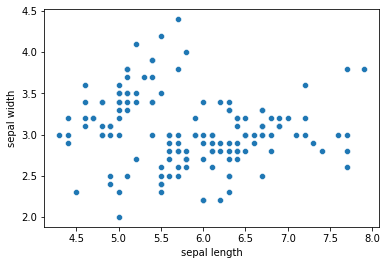

In [5]:
sns.scatterplot(data=df, x='sepal length', y='sepal width')

When you add `hue` argument as something categorical you can add colors to dots from different categories. This might be useful when you want to see if there are specific groupings of dots in your data.

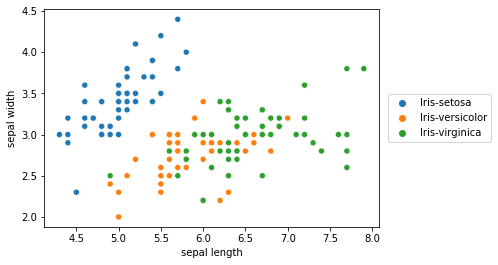

In [6]:
#note that you can change the plot using matplotlib library, don't worry about it now :D
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class')
plt.legend(bbox_to_anchor=(1.35, 0.5), loc='right') #move legend outside the plot

For additional settings you can try e.g. `style` and `size` parameters. You can play around as much as you want.

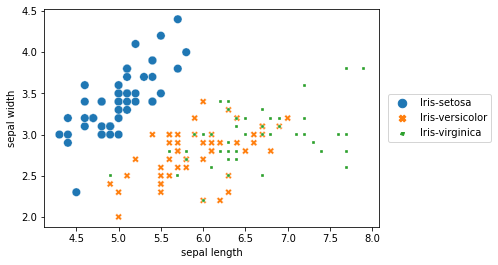

In [7]:
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class', style='class', size='class')
plt.legend(bbox_to_anchor=(1.35, 0.5), loc='right') #move legend outside the plot

## Histogram

<AxesSubplot:xlabel='sepal length', ylabel='Count'>

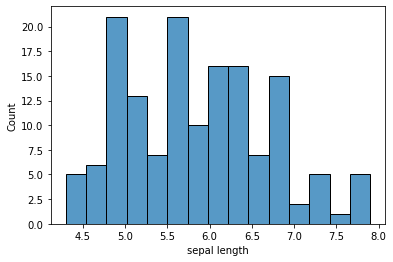

In [8]:
sns.histplot(data=df, x='sepal length',bins=15) #bins is the number of bars in the histogram

Kernel density estimation (KDE) can be used for univariate density plot.

<AxesSubplot:xlabel='sepal length', ylabel='Density'>

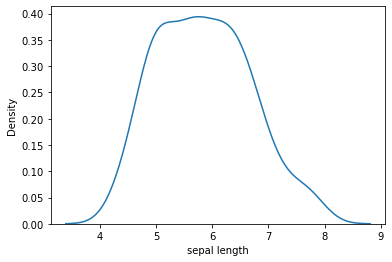

In [9]:
sns.kdeplot(data=df, x='sepal length') #kernel density estimation

As with scatterplots you can use `hue` argument to see differences between groups in the distribution. 

<AxesSubplot:xlabel='sepal length', ylabel='Count'>

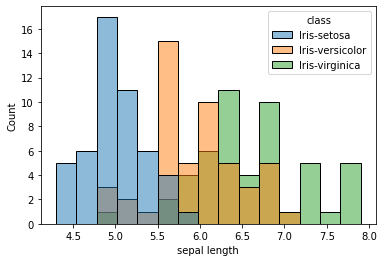

In [10]:
sns.histplot(data=df, x='sepal length',bins=15, hue='class')

Density plot might be easier to interpret than traditional histograms.

<AxesSubplot:xlabel='sepal length', ylabel='Density'>

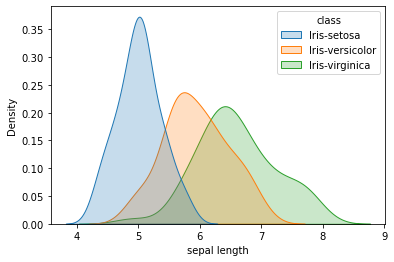

In [11]:
sns.kdeplot(data=df, x='sepal length', hue='class', fill=True) #fill=True fills the area under the curve

## Boxplot and violinplot

<AxesSubplot:xlabel='class', ylabel='sepal width'>

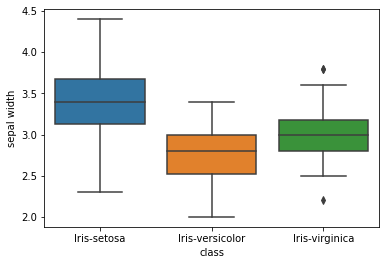

In [12]:
sns.boxplot(data=df,x='class', y='sepal width')

<AxesSubplot:xlabel='class', ylabel='sepal width'>

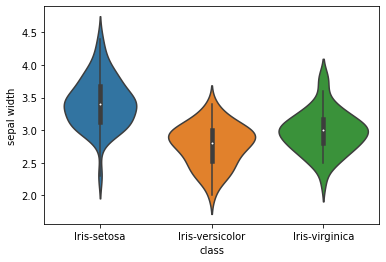

In [13]:
sns.violinplot(data=df,x='class', y='sepal width')

## Barplot

<AxesSubplot:xlabel='class', ylabel='sepal width'>

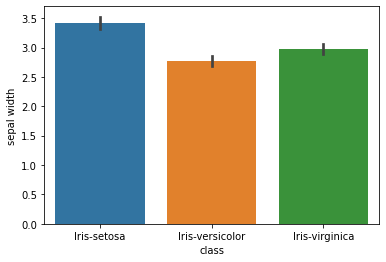

In [14]:
sns.barplot(data=df,x='class', y='sepal width')

## Heatmap

<AxesSubplot:>

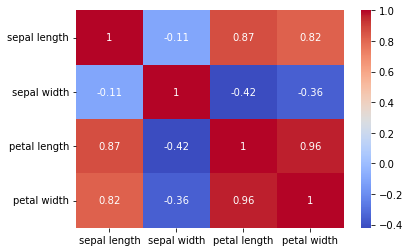

In [15]:
sns.heatmap(df.corr(),cmap = 'coolwarm', annot=True)

Since heatmap is diagonally symmetric we can remove either upper triangle matrix or lower triangle matrix. In addition to this we can remove the diagonal since correlation of variable with itself is always one.

<AxesSubplot:>

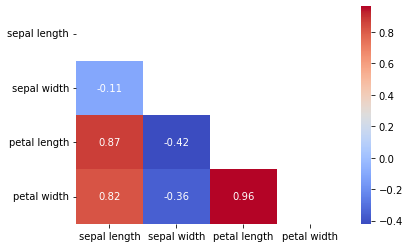

In [16]:
#Don't worry about the mask argument, it's just to make the heatmap look nicer :)
sns.heatmap(df.corr(),cmap = 'coolwarm', annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)))

## Pairplot

Seaborn's pairplot is a quick and simple way to plot multiple variables in one large pairwise plot. Again, `hue` is used for getting categories.

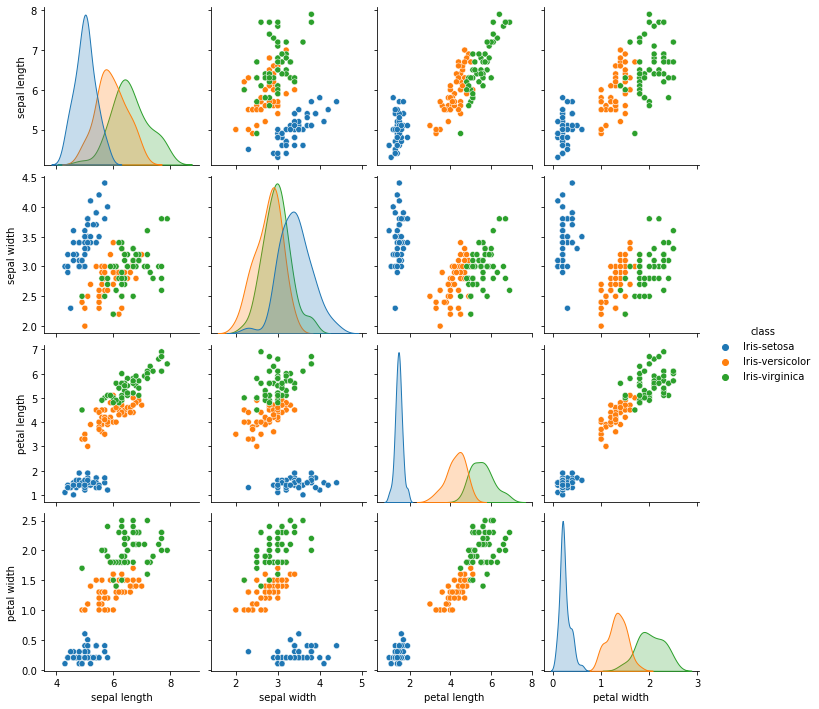

In [17]:
sns.pairplot(df, hue='class')

## Customizing plots

Seaborn is very flexible library. You can add things to your graphs using matplotlib's pyplot (imported as plt), e.g. plot title. In this section we are looking into some customatization options. As simple base plot we will use scatterplot.

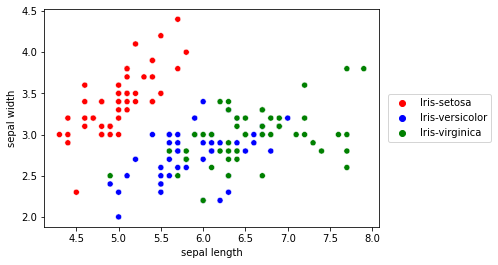

In [18]:
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class',palette=['red','blue','green'])
plt.legend(bbox_to_anchor=(1.35, 0.5), loc='right') #move legend outside the plot

You can use hex-codes for colors!

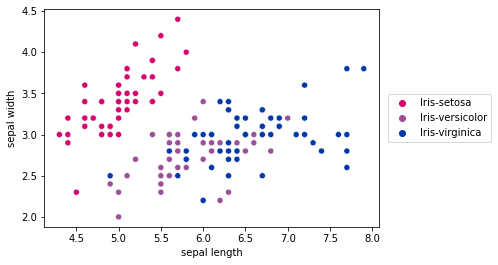

In [19]:
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class',palette=['#D60270', '#9B4F96', '#0038A8'])
plt.legend(bbox_to_anchor=(1.35, 0.5), loc='right')

Text(0, 0.5, 'Sepal width')

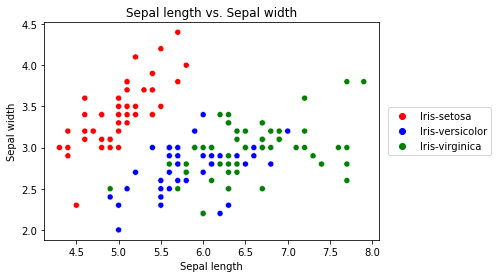

In [20]:
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class',palette=['red','blue','green'])
plt.legend(bbox_to_anchor=(1.35, 0.5), loc='right')
plt.title('Sepal length vs. Sepal width') #add title
plt.xlabel('Sepal length') #add x label
plt.ylabel('Sepal width') #add y label

(1.0, 5.0)

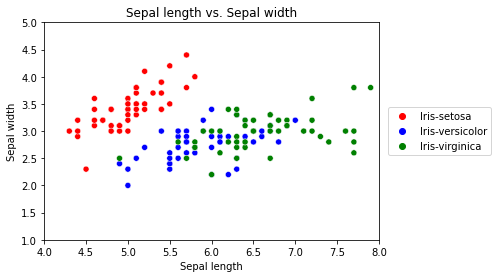

In [21]:
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class',palette=['red','blue','green'])
plt.legend(bbox_to_anchor=(1.35, 0.5), loc='right')
plt.title('Sepal length vs. Sepal width') #add title
plt.xlabel('Sepal length') #add x label
plt.ylabel('Sepal width') #add y label
plt.xlim(4,8) #set x axis limits
plt.ylim(1,5) #set y axis limits